In [117]:
import os
import json
import matplotlib.pyplot as plt
import numpy as np
import time

# Function to run a command in a new terminal
def run_in_terminal(command):
    os.system(f'gnome-terminal -- bash -c "cd build && ./{command}"')

# Wait x seconds
def wait(x):
    time.sleep(x)

def read_json(ipc):
    # Read map information from JSON file
    with open(f'build/json/{ipc}.json', 'r') as file:
        map_data = json.load(file)

    

    # Calculate the mean for each list of doubles in the map
    mean_map = {int(key): np.mean([value for value in values if value < 1500]) for key, values in map_data.items()}

    # Sort the mean_map based on the keys in ascending order
    return {str(k)+'b' if k < 1024 else str(k // 1024)+'Kb': mean_map[k] for k in sorted(mean_map)}

def create_plot(map, ipc):
    # Extract relevant information from the sorted_map
    x_values = list(map.keys())
    y_values = list(map.values())

    # Plot the data
    plt.plot(x_values, y_values)
    plt.xlabel('Message size')
    plt.ylabel('Latency(us)')
    plt.title(f'{ipc} IPC')
    plt.show()


# Socket IPC

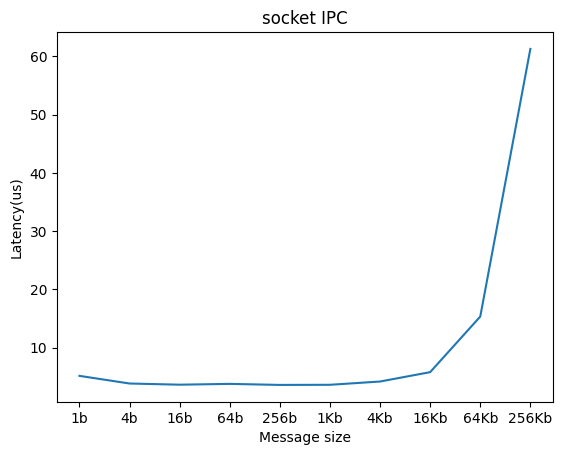

In [125]:
# Run the executables
run_in_terminal('server socket 100')
run_in_terminal('client socket 100')

# Wait for the terminals to finish
wait(2)

# Read from json
socket_map = read_json('socket')

# Plot the data
create_plot(socket_map, "socket")

# Shared Memory IPC

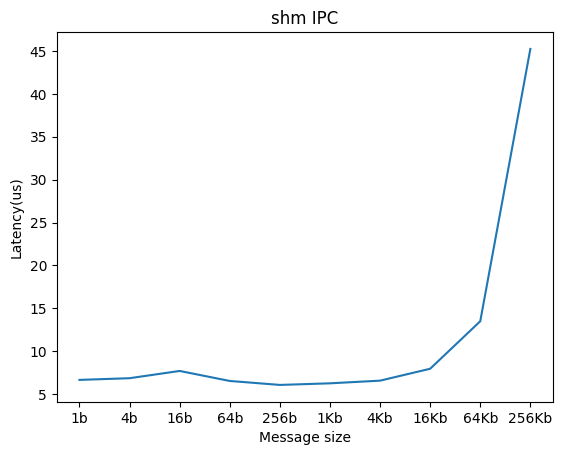

In [126]:
# Run the executables
run_in_terminal('server shm 100')
run_in_terminal('client shm 100')

# Wait for the terminals to finish
wait(2)
# Read from json
shm_map = read_json('shm')

# Plot the data
create_plot(shm_map, "shm")

# Pipe IPC

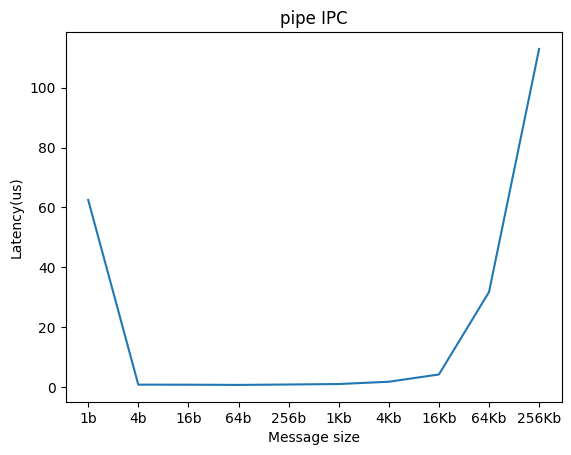

In [127]:
# Run the executables
run_in_terminal('server pipe 100')
run_in_terminal('client pipe 100')

# Wait for the terminals to finish
wait(2)

# Read from json
pipe_map = read_json('pipe')

# Plot the data
create_plot(pipe_map, "pipe")

# Message Queue IPC

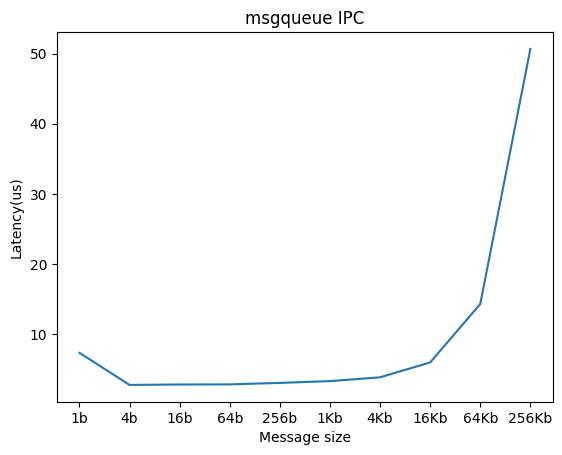

In [129]:
# Run the executables
run_in_terminal('server msgqueue 100')
run_in_terminal('client msgqueue 100')

# Wait for the terminals to finish
wait(2)

# Read from json
msgqueue_map = read_json('msgqueue')

# Plot the data
create_plot(msgqueue_map, "msgqueue")

# File IPC

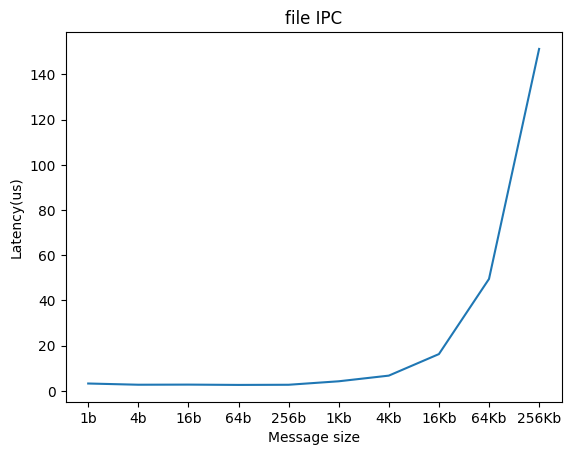

In [130]:
# Run the executables
run_in_terminal('client file 100')
run_in_terminal('server file 100')

# Wait for the terminals to finish
wait(2)

# Read from json
file_map = read_json('file')

# Plot the data
create_plot(file_map, "file")

## Final plot with all IPCs

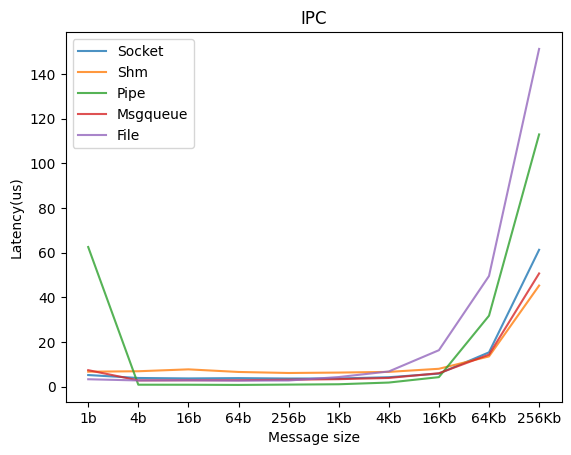

In [131]:
# Extract relevant information from the sorted_map
x_values = list(socket_map.keys())
y1_values = list(socket_map.values())
y2_values = list(shm_map.values())
y3_values = list(pipe_map.values())
y4_values = list(msgqueue_map.values())
y5_values = list(file_map.values())

# Plot the data
plt.plot(x_values, y1_values, alpha=0.8, label="Socket")
plt.plot(x_values, y2_values, alpha=0.8, label="Shm")
plt.plot(x_values, y3_values, alpha=0.8, label="Pipe")
plt.plot(x_values, y4_values, alpha=0.8, label="Msgqueue")
plt.plot(x_values, y5_values, alpha=0.8, label="File")

plt.xlabel('Message size')
plt.ylabel('Latency(us)')

plt.title('IPC')
plt.legend()
plt.show()